In [1]:
import tensorflow as tf
print(tf.__version__)

/home/drx/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/drx/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/drx/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/drx/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

1.14.0


/home/drx/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/drx/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/drx/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/drx/anaconda3/lib/python3.7/site-packages/tensorboard/compat/ten

In [1]:
import numpy as np
import pandas as pd

import os

import utils.file_handling as io
from utils import plotting as plt


from keras.layers import Input, Dense, Flatten, Conv2D, concatenate
from keras.models import Model

from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D

from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

import numpy as np
np.random.seed(0)  # Set a random seed for reproducibility

In [4]:
training_path = os.getcwd()+'/data/training/'
train_tasks = io.get_tasks(training_path)
train_tasks[0]

{'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]],
   'output': [[7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 7, 0, 0, 0, 0, 7, 7, 0],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 7, 0, 0, 0, 0, 7, 7, 0],
    [7, 0, 7, 7, 0, 7, 0, 0, 0],
    [7, 0, 7, 7, 0, 7, 0, 0, 0],
    [7, 7, 0, 7, 7, 0, 0, 0, 0]]}],
 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]],
   'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]]},
  {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
   'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 4, 0, 0, 0, 0, 0, 4, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4

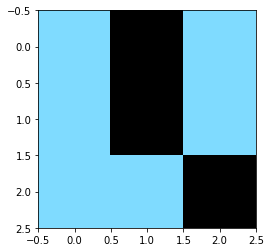

In [6]:
from utils import plotting as plt

plt.plot_matrix(train_tasks[0]['test'][0]['input'])